# Test Using VSCode Jupyter


In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import LinearModel, LorentzianModel, ExponentialModel

In [2]:
# Read data from GitHub and set index cols for stack()
tsdata = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
) 
# Add multi column index for stacking the date columns into rows
tsdata_index = tsdata.set_index(['Province/State','Country/Region','Lat','Long']
)
# Preview the first 5 lines of the loaded data 
tsdata_index.head()

1/22/20  1/23/20  1/24/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/25/20  1/26/20  1/27/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/28/20  1/29/20  1/30/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/31/20  ...  4/24/20  \
Province/State Country/Region Lat      Long              ...            
NaN            Afghanistan     33.0000 65.0000        0  ...     1351   
               Albania         41.1533 20.1683        0  ...      678   
               Algeria         28.0339 1.6596         0  ...     3127   
               Andorra         42.5063 1.5218         0  ...      731   
               Angola         -11.2027 17.8739        0  ...       25   

                                                4/25/20  4/26/20  4/27/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000     1463     1531     1703   
               Albania         41.1533 20.1683      712      726      736   
               Algeria         28.0339 1.6596      3256     3382     3517   
               Andorra         42.5063 1.5218       738      738      743   
               Angola         -11.2027 17.8739       25       26       27   

                                                4/28/20  4/29/20  4/30/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000     1828     1939     2171   
               Albania         41.1533 20.1683      750      766      773   
               Algeria         28.0339 1.6596      3649     3848     4006   
               Andorra         42.5063 1.5218       743      743      745   
               Angola         -11.2027 17.8739       27       27       27   

                                                5/1/20  5/2/20  5/3/20  
Province/State Country/Region Lat      Long                             
NaN            Afghanistan     33.0000 65.0000    2335    2469    2704  
               Albania         41.1533 20.1683     782     789     795  
               Algeria         28.0339 1.6596     4154    4295    4474  
               Andorra         42.5063 1.5218      745     747     748  
               Angola         -11.2027 17.8739      30      35      35  

[5 rows x 103 columns]

In [3]:
# stack date columns into rows
tsdata_stack = tsdata_index.stack()
tsdata_stack



Province/State  Country/Region  Lat        Long              
NaN             Afghanistan     33.000000  65.000000  1/22/20      0
                                                      1/23/20      0
                                                      1/24/20      0
                                                      1/25/20      0
                                                      1/26/20      0
                                                                ... 
                Tajikistan      38.861034  71.276093  4/29/20      0
                                                      4/30/20     15
                                                      5/1/20      15
                                                      5/2/20      76
                                                      5/3/20     128
Length: 27398, dtype: int64

In [4]:

# Reset the index to repeat the index values
tsdata_stack = tsdata_stack.reset_index()
# The stack and reset_index create column names that need changing
tsdata_stack.rename(columns={'level_0':'row_id','Province/State':'prov_state','Country/Region':'country','Lat':'lat','Long':'lon','level_4':'date_char',0:"cases"}, inplace=True)
# Convert the date character field to a pandas date
tsdata_stack['date'] = pd.to_datetime(tsdata_stack['date_char'])
tsdata_stack

,prov_state,country,lat,lon,date_char,cases,date
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,2020-01-22
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0,2020-01-23
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0,2020-01-24
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0,2020-01-25
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0,2020-01-26
...,...,...,...,...,...,...,...
27393,NaN,Tajikistan,38.861034,71.276093,4/29/20,0,2020-04-29
27394,NaN,Tajikistan,38.861034,71.276093,4/30/20,15,2020-04-30
27395,NaN,Tajikistan,38.861034,71.276093,5/1/20,15,2020-05-01
27396,NaN,Tajikistan,38.861034,71.276093,5/2/20,76,2020-05-02


In [5]:
# Check of column names
tsdata_stack.columns

Index(['prov_state', 'country', 'lat', 'lon', 'date_char', 'cases', 'date'], dtype='object')

In [6]:
# Aggregate to basic global timeseries
tsdata_global = tsdata_stack.groupby(['date'])[['cases']].sum().reset_index()
tsdata_global['days_since'] = (pd.to_datetime('2020-01-21') - tsdata_global['date']).dt.days.abs()
## Get the max and min date in the dataset
date_min = tsdata_global.date.min()
date_max = tsdata_global.date.max()
tsdata_global


,date,cases,days_since
0,2020-01-22,555,1
1,2020-01-23,654,2
2,2020-01-24,941,3
3,2020-01-25,1434,4
4,2020-01-26,2118,5
...,...,...,...
98,2020-04-29,3172287,99
99,2020-04-30,3256853,100
100,2020-05-01,3343777,101
101,2020-05-02,3427343,102


In [7]:
# Reset index
tsdata_global.set_index('date')['cases']


date
2020-01-22        555
2020-01-23        654
2020-01-24        941
2020-01-25       1434
2020-01-26       2118
               ...   
2020-04-29    3172287
2020-04-30    3256853
2020-05-01    3343777
2020-05-02    3427343
2020-05-03    3506729
Name: cases, Length: 103, dtype: int64

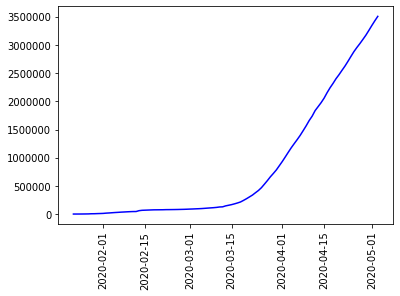

In [8]:
# Plot the results notmal scale
plt.plot(tsdata_global['date'], tsdata_global['cases'], 'b')
plt.xticks(rotation=90)
plt.show()

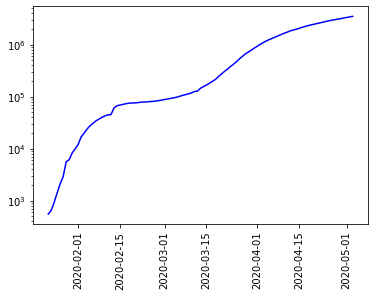

In [9]:
# Plot the results log scale
plt.plot(tsdata_global['date'], tsdata_global['cases'], 'b')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

# Install python package

```bash
!pip install lmfit --user
```

In [10]:
## Set the period of fit
## Only use recent data as exponential is changing with social distancing
## Limit to data to 21-Apr-2020 then add actual new cases to compare forecast to actual
#tsdata_recent = tsdata_global[tsdata_global['date'] >= '2020-04-01']
#tsdata_recent

## Try this method from: https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
mask = (tsdata_global['date'] >= '2020-04-01') & (tsdata_global['date'] <= '2020-04-21')
tsdata_recent = tsdata_global.loc[mask]
tsdata_recent

,date,cases,days_since
70,2020-04-01,932638,71
71,2020-04-02,1013458,72
72,2020-04-03,1095876,73
73,2020-04-04,1176059,74
74,2020-04-05,1249737,75
75,2020-04-06,1321427,76
76,2020-04-07,1396438,77
77,2020-04-08,1480200,78
78,2020-04-09,1565538,79
79,2020-04-10,1657929,80


In [11]:
## Fit an exponential model
modelExp = ExponentialModel()
paramsExp = modelExp.guess(tsdata_recent['cases'], x=tsdata_recent['days_since'])
resultExp = modelExp.fit(tsdata_recent['cases'], paramsExp, x=tsdata_recent['days_since'])

In [12]:
paramsExp


name,value,initial value,min,max,vary
amplitude,30756.4094,None,-inf,inf,True
decay,-20.2915302,None,-inf,inf,True


In [13]:
resultExp

In [14]:
# Fit a Linear Model
modelLin = LinearModel()
paramsLin = modelLin.guess(tsdata_recent['cases'], x=tsdata_recent['days_since'])
resultLin = modelLin.fit(tsdata_recent['cases'], paramsLin, x=tsdata_recent['days_since'])

In [15]:
paramsLin

name,value,initial value,min,max,vary
slope,81546.8494,None,-inf,inf,True
intercept,-4865884.42,None,-inf,inf,True


In [16]:
resultLin

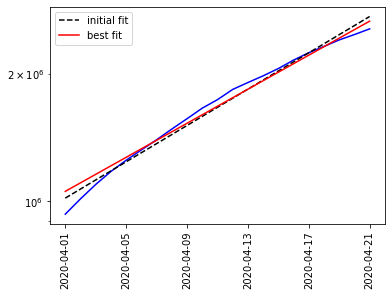

In [17]:
# Exponential Model
# Plot the results with Log scale
plt.plot(tsdata_recent['date'], tsdata_recent['cases'], 'b')
plt.plot(tsdata_recent['date'], resultExp.init_fit, 'k--', label='initial fit')
plt.plot(tsdata_recent['date'], resultExp.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

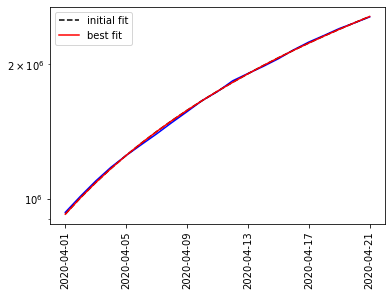

In [18]:
# Linear Model
# Plot the results with Log scale
plt.plot(tsdata_recent['date'], tsdata_recent['cases'], 'b')
plt.plot(tsdata_recent['date'], resultLin.init_fit, 'k--', label='initial fit')
plt.plot(tsdata_recent['date'], resultLin.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [19]:
## Create a line space that represtents the complete timeseries with a 15 day forecast horizon
linespace_size = (date_max - date_min).days + 15
xwide = np.linspace(1, linespace_size, linespace_size)
xwide

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117.])

In [21]:
## Exponenital
## Score model for values outside fitting range
predictedExp = modelExp.eval(paramsExp, x=xwide)
tsdata_pExp = pd.DataFrame({'x':xwide, 'pred_cases':predictedExp})

## join dataframes
## Fill the NaN values with 0
tsdata_Exp = pd.concat([tsdata_global, tsdata_pExp], axis=1, sort=False).fillna(0)

## Fill out the date
tsdata_Exp['days_type'] = pd.to_timedelta(tsdata_Exp['x'], unit='D')
tsdata_Exp['date_new'] = pd.to_datetime('2020-01-21') + tsdata_Exp['days_type']
tsdata_Exp

## Create datafram that is a plot since 14-Mar-2020
mask = (tsdata_Exp['date_new'] >= '2020-03-14')
tsdata_plotExp = tsdata_Exp.loc[mask]
tsdata_plotExp

,date,cases,days_since,x,pred_cases,days_type,date_new
52,2020-03-14 00:00:00,156116.0,53.0,53.0,4.190648e+05,53 days,2020-03-14
53,2020-03-15 00:00:00,167466.0,54.0,54.0,4.402344e+05,54 days,2020-03-15
54,2020-03-16 00:00:00,181603.0,55.0,55.0,4.624733e+05,55 days,2020-03-16
55,2020-03-17 00:00:00,197113.0,56.0,56.0,4.858357e+05,56 days,2020-03-17
56,2020-03-18 00:00:00,214846.0,57.0,57.0,5.103783e+05,57 days,2020-03-18
...,...,...,...,...,...,...,...
112,0,0.0,0.0,113.0,8.062060e+06,113 days,2020-05-13
113,0,0.0,0.0,114.0,8.469324e+06,114 days,2020-05-14
114,0,0.0,0.0,115.0,8.897162e+06,115 days,2020-05-15
115,0,0.0,0.0,116.0,9.346613e+06,116 days,2020-05-16


In [24]:
## Linear
## Score model for values outside fitting range
predictedLin = modelLin.eval(paramsLin, x=xwide)
tsdata_plin = pd.DataFrame({'x':xwide, 'pred_cases':predictedLin})

## join dataframes
## Fill the NaN values with 0
tsdata_lin = pd.concat([tsdata_global, tsdata_plin], axis=1, sort=False).fillna(0)

## Fill out the date
tsdata_lin['days_type'] = pd.to_timedelta(tsdata_lin['x'], unit='D')
tsdata_lin['date_new'] = pd.to_datetime('2020-01-21') + tsdata_lin['days_type']
tsdata_lin

## Create datafram that is a plot since 14-Mar-2020
mask = (tsdata_lin['date_new'] >= '2020-03-14')
tsdata_plotLin = tsdata_lin.loc[mask]
tsdata_plotLin

,date,cases,days_since,x,pred_cases,days_type,date_new
52,2020-03-14 00:00:00,156116.0,53.0,53.0,-5.439014e+05,53 days,2020-03-14
53,2020-03-15 00:00:00,167466.0,54.0,54.0,-4.623546e+05,54 days,2020-03-15
54,2020-03-16 00:00:00,181603.0,55.0,55.0,-3.808077e+05,55 days,2020-03-16
55,2020-03-17 00:00:00,197113.0,56.0,56.0,-2.992609e+05,56 days,2020-03-17
56,2020-03-18 00:00:00,214846.0,57.0,57.0,-2.177140e+05,57 days,2020-03-18
...,...,...,...,...,...,...,...
112,0,0.0,0.0,113.0,4.348910e+06,113 days,2020-05-13
113,0,0.0,0.0,114.0,4.430456e+06,114 days,2020-05-14
114,0,0.0,0.0,115.0,4.512003e+06,115 days,2020-05-15
115,0,0.0,0.0,116.0,4.593550e+06,116 days,2020-05-16


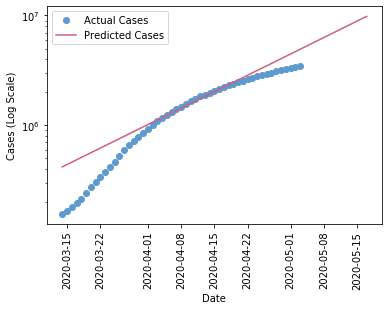

In [25]:
# Exponential model log scale
# Plot the results
plt.plot(tsdata_plotExp['date_new'], tsdata_plotExp['cases'], 'o', color='#5f9acf', label='Actual Cases')
plt.plot(tsdata_plotExp['date_new'], tsdata_plotExp['pred_cases'], '-', color='#cf5f81',label='Predicted Cases')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Cases (Log Scale)')
plt.show()

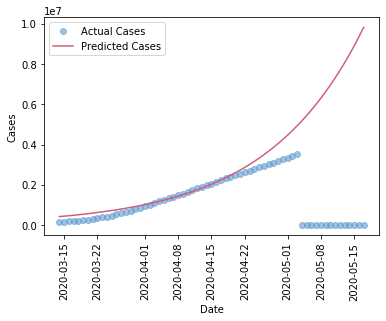

In [28]:
# Exponential model linear scale
# Plot the results
plt.plot(tsdata_plotExp['date_new'], tsdata_plotExp['cases'], 'o', color='#5f9acf', alpha=0.6, label='Actual Cases')
plt.plot(tsdata_plotExp['date_new'], tsdata_plotExp['pred_cases'], '-', color='#cf5f81',label='Predicted Cases')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

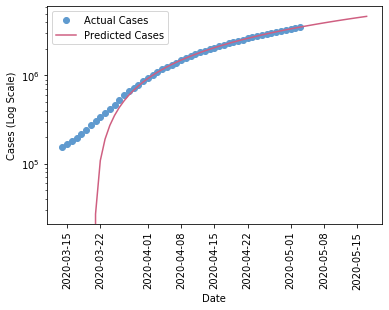

In [29]:
# Linear model log scale
# Plot the results
plt.plot(tsdata_plotLin['date_new'], tsdata_plotLin['cases'], 'o', color='#5f9acf', label='Actual Cases')
plt.plot(tsdata_plotLin['date_new'], tsdata_plotLin['pred_cases'], '-', color='#cf5f81',label='Predicted Cases')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Cases (Log Scale)')
plt.show()

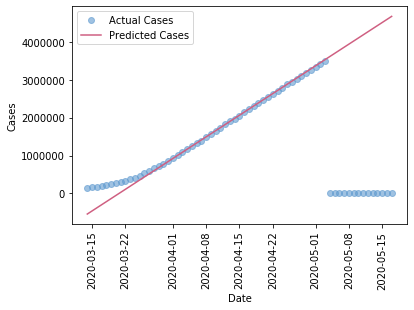

In [30]:
# Linear model linear scale
# Plot the results
plt.plot(tsdata_plotLin['date_new'], tsdata_plotLin['cases'], 'o', color='#5f9acf', alpha=0.6, label='Actual Cases')
plt.plot(tsdata_plotLin['date_new'], tsdata_plotLin['pred_cases'], '-', color='#cf5f81',label='Predicted Cases')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

In [39]:
# List all dataframes
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]
print(alldfs) 
# df1, df2

['_', '_11', '_12', '_13', '_19', '_2', '_20', '_31', '_36', '_4', '_6', '__', 'tsdata', 'tsdata_all', 'tsdata_global', 'tsdata_index', 'tsdata_plot', 'tsdata_pred', 'tsdata_recent', 'tsdata_stack']
